# Black-Scholes Option Pricing Model

## Introduction

The Black-Scholes model, developed by Fischer Black, Myron Scholes, and Robert Merton in 1973, revolutionized quantitative finance by providing an analytical formula for pricing European-style options. This model remains foundational in derivatives pricing and risk management.

## Theoretical Foundation

### Assumptions

The Black-Scholes model relies on several key assumptions:

1. The underlying asset follows geometric Brownian motion with constant volatility
2. No dividends are paid during the option's life
3. Markets are frictionless (no transaction costs, continuous trading)
4. The risk-free interest rate is constant
5. No arbitrage opportunities exist

### Geometric Brownian Motion

The underlying asset price $S_t$ follows the stochastic differential equation:

$$dS_t = \mu S_t \, dt + \sigma S_t \, dW_t$$

where:
- $\mu$ is the drift rate (expected return)
- $\sigma$ is the volatility
- $W_t$ is a standard Wiener process

### The Black-Scholes Partial Differential Equation

Through Itô's lemma and delta hedging arguments, the option price $V(S,t)$ satisfies:

$$\frac{\partial V}{\partial t} + \frac{1}{2}\sigma^2 S^2 \frac{\partial^2 V}{\partial S^2} + rS\frac{\partial V}{\partial S} - rV = 0$$

### Analytical Solution

For a **European call option** with strike $K$ and maturity $T$:

$$C(S, t) = S_0 N(d_1) - K e^{-r(T-t)} N(d_2)$$

For a **European put option**:

$$P(S, t) = K e^{-r(T-t)} N(-d_2) - S_0 N(-d_1)$$

where:

$$d_1 = \frac{\ln(S_0/K) + (r + \sigma^2/2)(T-t)}{\sigma\sqrt{T-t}}$$

$$d_2 = d_1 - \sigma\sqrt{T-t}$$

and $N(\cdot)$ is the cumulative distribution function of the standard normal distribution.

### The Greeks

Sensitivities of option prices to various parameters are known as "Greeks":

- **Delta ($\Delta$)**: $\frac{\partial V}{\partial S}$ - sensitivity to underlying price
- **Gamma ($\Gamma$)**: $\frac{\partial^2 V}{\partial S^2}$ - rate of change of delta
- **Theta ($\Theta$)**: $\frac{\partial V}{\partial t}$ - time decay
- **Vega ($\nu$)**: $\frac{\partial V}{\partial \sigma}$ - sensitivity to volatility
- **Rho ($\rho$)**: $\frac{\partial V}{\partial r}$ - sensitivity to interest rate

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Set up plotting style
plt.style.use('seaborn-v0_8-whitegrid')
np.random.seed(42)

## Implementation of Black-Scholes Formulas

We implement the core pricing functions and Greeks for European options.

In [2]:
def black_scholes_d1_d2(S, K, T, r, sigma):
    """
    Calculate d1 and d2 parameters for Black-Scholes formula.
    
    Parameters:
    -----------
    S : float - Current stock price
    K : float - Strike price
    T : float - Time to maturity (years)
    r : float - Risk-free interest rate
    sigma : float - Volatility
    
    Returns:
    --------
    d1, d2 : tuple of floats
    """
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return d1, d2


def black_scholes_call(S, K, T, r, sigma):
    """
    Calculate European call option price using Black-Scholes formula.
    """
    d1, d2 = black_scholes_d1_d2(S, K, T, r, sigma)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price


def black_scholes_put(S, K, T, r, sigma):
    """
    Calculate European put option price using Black-Scholes formula.
    """
    d1, d2 = black_scholes_d1_d2(S, K, T, r, sigma)
    put_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    return put_price


# Greeks calculations
def delta_call(S, K, T, r, sigma):
    """Delta for call option."""
    d1, _ = black_scholes_d1_d2(S, K, T, r, sigma)
    return norm.cdf(d1)


def delta_put(S, K, T, r, sigma):
    """Delta for put option."""
    d1, _ = black_scholes_d1_d2(S, K, T, r, sigma)
    return norm.cdf(d1) - 1


def gamma(S, K, T, r, sigma):
    """Gamma (same for call and put)."""
    d1, _ = black_scholes_d1_d2(S, K, T, r, sigma)
    return norm.pdf(d1) / (S * sigma * np.sqrt(T))


def vega(S, K, T, r, sigma):
    """Vega (same for call and put), returned per 1% change in volatility."""
    d1, _ = black_scholes_d1_d2(S, K, T, r, sigma)
    return S * norm.pdf(d1) * np.sqrt(T) * 0.01


def theta_call(S, K, T, r, sigma):
    """Theta for call option (per day)."""
    d1, d2 = black_scholes_d1_d2(S, K, T, r, sigma)
    term1 = -S * norm.pdf(d1) * sigma / (2 * np.sqrt(T))
    term2 = -r * K * np.exp(-r * T) * norm.cdf(d2)
    return (term1 + term2) / 365


def theta_put(S, K, T, r, sigma):
    """Theta for put option (per day)."""
    d1, d2 = black_scholes_d1_d2(S, K, T, r, sigma)
    term1 = -S * norm.pdf(d1) * sigma / (2 * np.sqrt(T))
    term2 = r * K * np.exp(-r * T) * norm.cdf(-d2)
    return (term1 + term2) / 365

## Numerical Example

Let's price European call and put options with the following parameters:
- Current stock price $S_0 = 100$
- Strike price $K = 100$ (at-the-money)
- Time to maturity $T = 1$ year
- Risk-free rate $r = 5\%$
- Volatility $\sigma = 20\%$

In [3]:
# Parameters
S0 = 100      # Current stock price
K = 100       # Strike price
T = 1.0       # Time to maturity (1 year)
r = 0.05      # Risk-free rate (5%)
sigma = 0.20  # Volatility (20%)

# Calculate option prices
call_price = black_scholes_call(S0, K, T, r, sigma)
put_price = black_scholes_put(S0, K, T, r, sigma)

# Calculate Greeks
call_delta = delta_call(S0, K, T, r, sigma)
put_delta = delta_put(S0, K, T, r, sigma)
option_gamma = gamma(S0, K, T, r, sigma)
option_vega = vega(S0, K, T, r, sigma)
call_theta = theta_call(S0, K, T, r, sigma)
put_theta = theta_put(S0, K, T, r, sigma)

print("Black-Scholes Option Pricing Results")
print("=" * 40)
print(f"\nParameters:")
print(f"  Stock Price (S): ${S0:.2f}")
print(f"  Strike Price (K): ${K:.2f}")
print(f"  Time to Maturity: {T} year")
print(f"  Risk-free Rate: {r*100:.1f}%")
print(f"  Volatility: {sigma*100:.1f}%")
print(f"\nOption Prices:")
print(f"  Call Option: ${call_price:.4f}")
print(f"  Put Option:  ${put_price:.4f}")
print(f"\nGreeks:")
print(f"  Call Delta: {call_delta:.4f}")
print(f"  Put Delta:  {put_delta:.4f}")
print(f"  Gamma:      {option_gamma:.4f}")
print(f"  Vega:       {option_vega:.4f}")
print(f"  Call Theta: {call_theta:.4f} (per day)")
print(f"  Put Theta:  {put_theta:.4f} (per day)")

# Verify put-call parity: C - P = S - K*exp(-rT)
parity_lhs = call_price - put_price
parity_rhs = S0 - K * np.exp(-r * T)
print(f"\nPut-Call Parity Check:")
print(f"  C - P = {parity_lhs:.4f}")
print(f"  S - K*exp(-rT) = {parity_rhs:.4f}")
print(f"  Difference: {abs(parity_lhs - parity_rhs):.2e}")

Black-Scholes Option Pricing Results

Parameters:
  Stock Price (S): $100.00
  Strike Price (K): $100.00
  Time to Maturity: 1.0 year
  Risk-free Rate: 5.0%
  Volatility: 20.0%

Option Prices:
  Call Option: $10.4506
  Put Option:  $5.5735

Greeks:
  Call Delta: 0.6368
  Put Delta:  -0.3632
  Gamma:      0.0188
  Vega:       0.3752
  Call Theta: -0.0176 (per day)
  Put Theta:  -0.0045 (per day)

Put-Call Parity Check:
  C - P = 4.8771
  S - K*exp(-rT) = 4.8771
  Difference: 0.00e+00


## Visualization

We create a comprehensive visualization showing:
1. Option prices as a function of stock price
2. Delta profiles
3. Gamma surface
4. Option prices across different volatilities

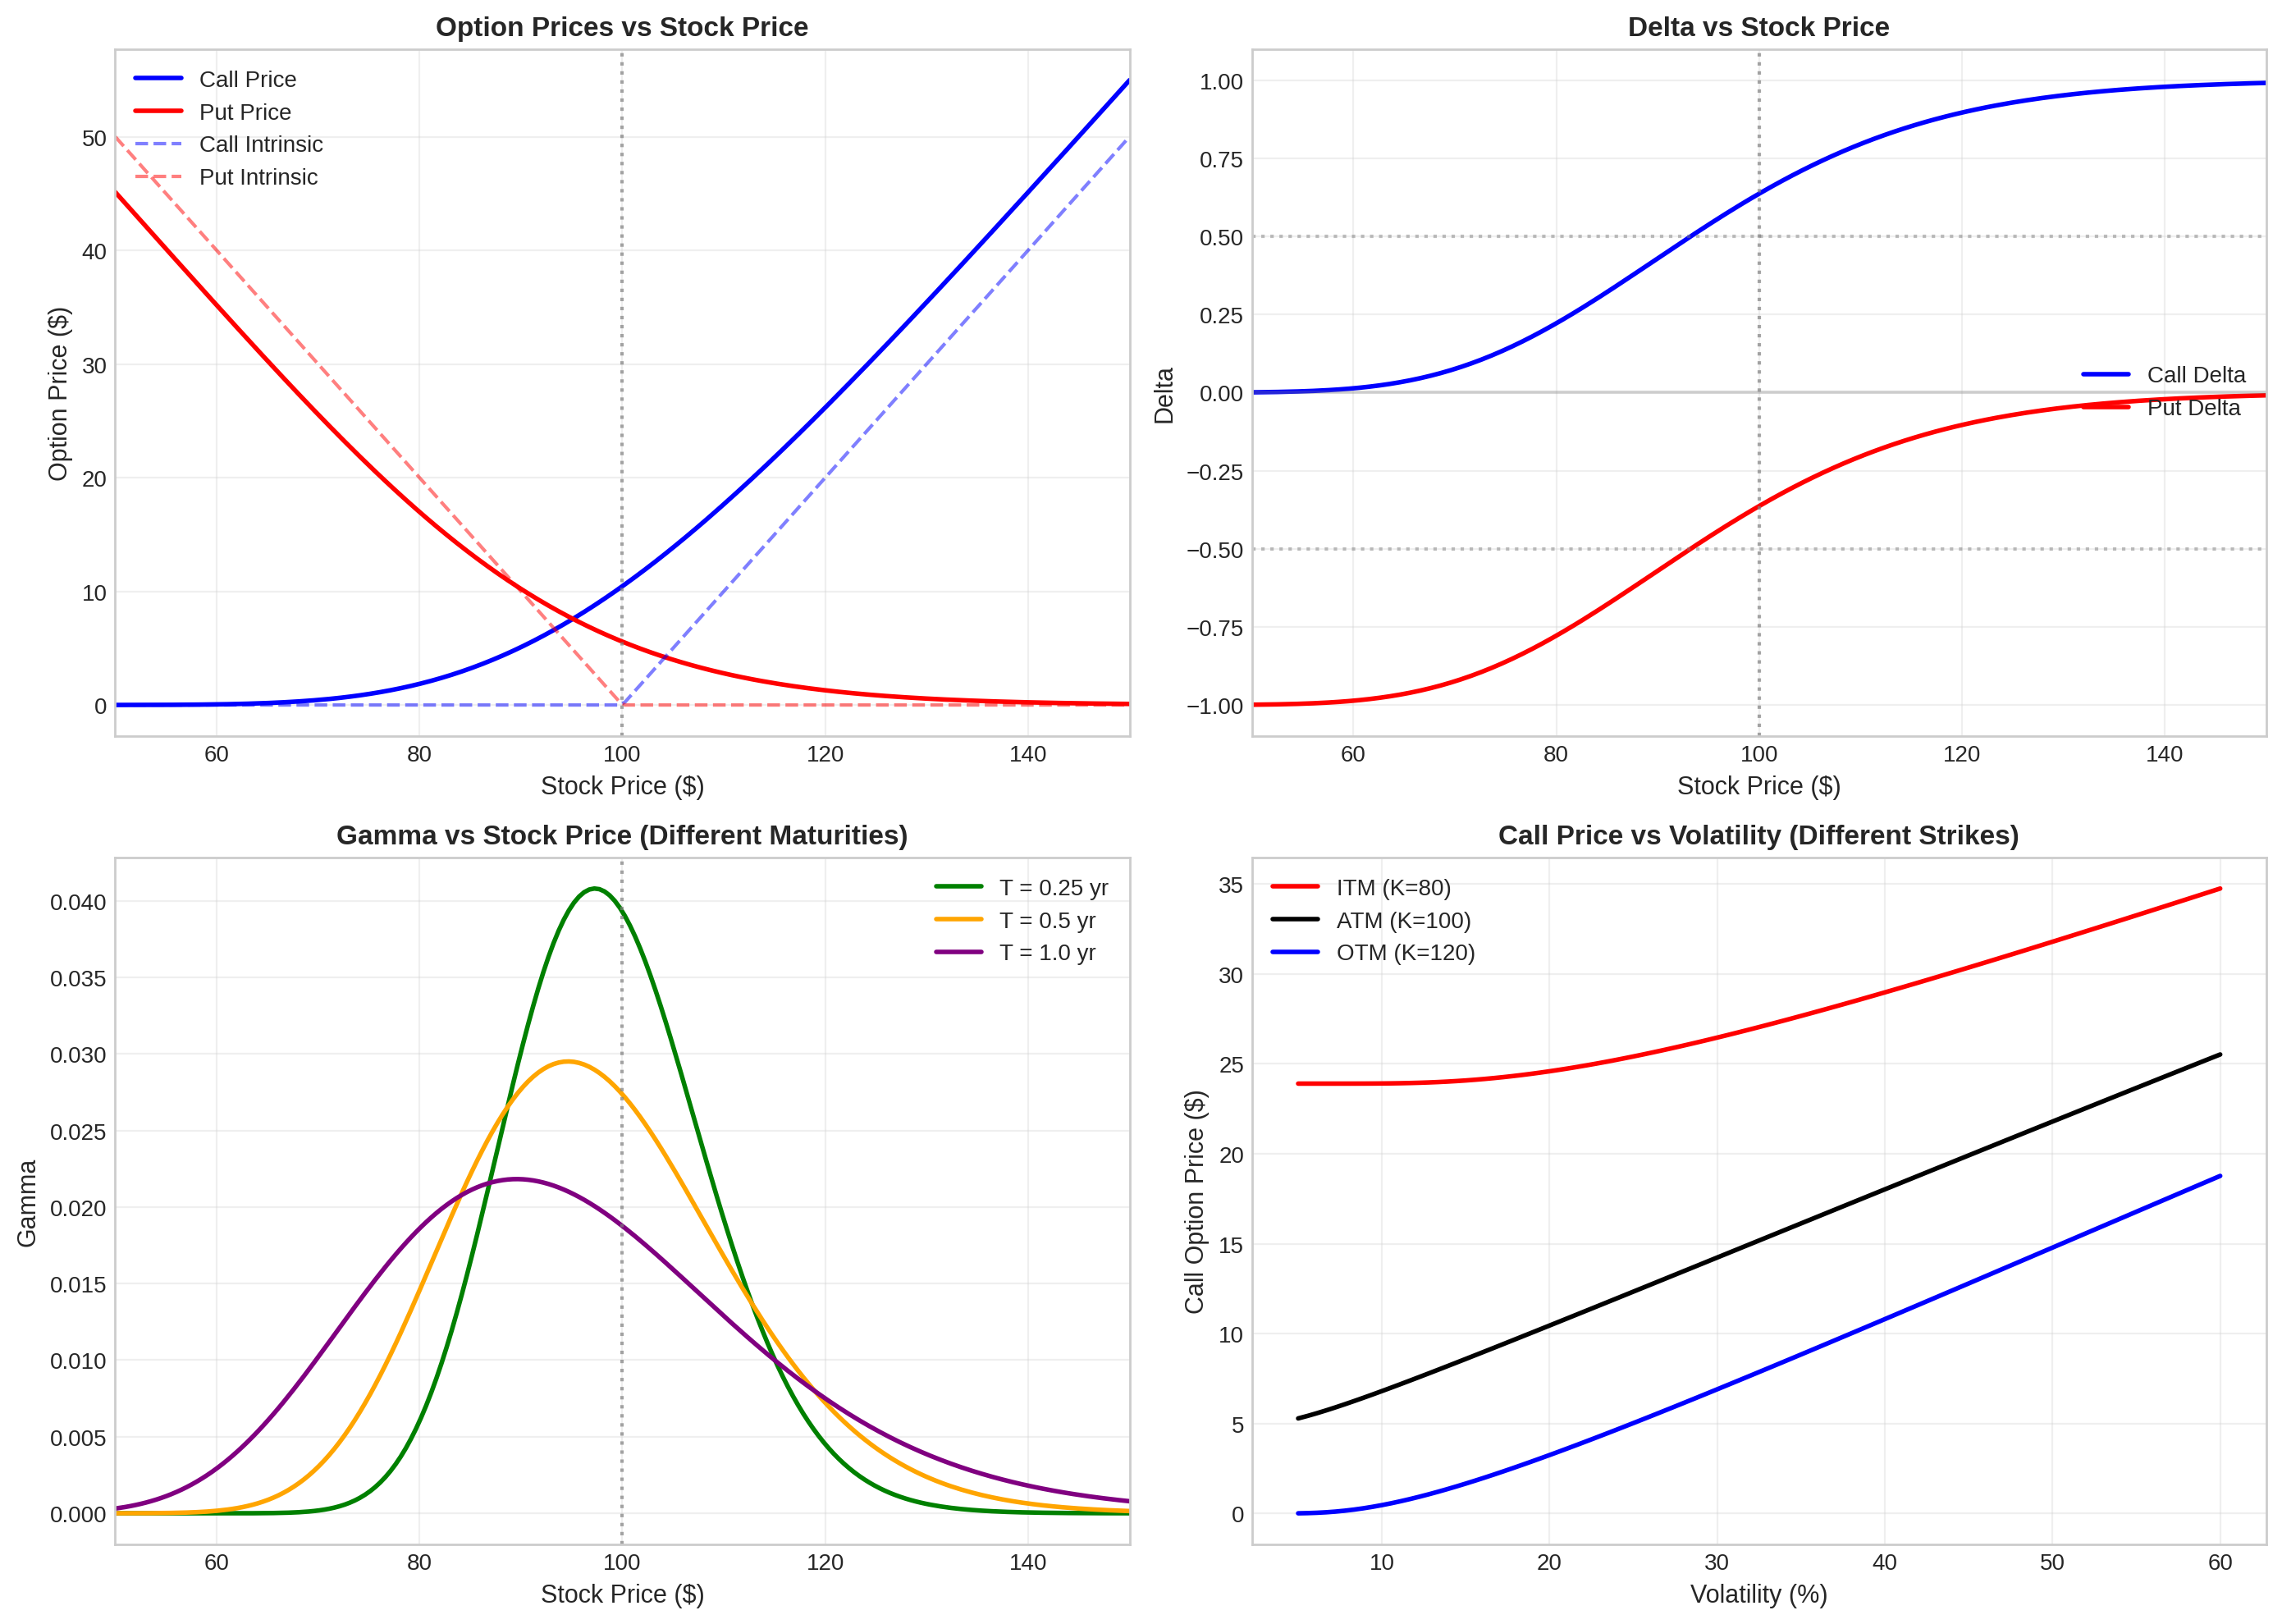


Plot saved to 'plot.png'


In [4]:
# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Range of stock prices
S_range = np.linspace(50, 150, 200)

# Plot 1: Option Prices vs Stock Price
ax1 = axes[0, 0]
call_prices = [black_scholes_call(S, K, T, r, sigma) for S in S_range]
put_prices = [black_scholes_put(S, K, T, r, sigma) for S in S_range]
intrinsic_call = np.maximum(S_range - K, 0)
intrinsic_put = np.maximum(K - S_range, 0)

ax1.plot(S_range, call_prices, 'b-', linewidth=2, label='Call Price')
ax1.plot(S_range, put_prices, 'r-', linewidth=2, label='Put Price')
ax1.plot(S_range, intrinsic_call, 'b--', alpha=0.5, label='Call Intrinsic')
ax1.plot(S_range, intrinsic_put, 'r--', alpha=0.5, label='Put Intrinsic')
ax1.axvline(x=K, color='gray', linestyle=':', alpha=0.7)
ax1.set_xlabel('Stock Price ($)', fontsize=11)
ax1.set_ylabel('Option Price ($)', fontsize=11)
ax1.set_title('Option Prices vs Stock Price', fontsize=12, fontweight='bold')
ax1.legend(loc='upper left')
ax1.set_xlim(50, 150)
ax1.grid(True, alpha=0.3)

# Plot 2: Delta vs Stock Price
ax2 = axes[0, 1]
call_deltas = [delta_call(S, K, T, r, sigma) for S in S_range]
put_deltas = [delta_put(S, K, T, r, sigma) for S in S_range]

ax2.plot(S_range, call_deltas, 'b-', linewidth=2, label='Call Delta')
ax2.plot(S_range, put_deltas, 'r-', linewidth=2, label='Put Delta')
ax2.axhline(y=0, color='gray', linestyle='-', alpha=0.3)
ax2.axhline(y=0.5, color='gray', linestyle=':', alpha=0.5)
ax2.axhline(y=-0.5, color='gray', linestyle=':', alpha=0.5)
ax2.axvline(x=K, color='gray', linestyle=':', alpha=0.7)
ax2.set_xlabel('Stock Price ($)', fontsize=11)
ax2.set_ylabel('Delta', fontsize=11)
ax2.set_title('Delta vs Stock Price', fontsize=12, fontweight='bold')
ax2.legend(loc='center right')
ax2.set_xlim(50, 150)
ax2.set_ylim(-1.1, 1.1)
ax2.grid(True, alpha=0.3)

# Plot 3: Gamma vs Stock Price for different times to maturity
ax3 = axes[1, 0]
times = [0.25, 0.5, 1.0]
colors = ['green', 'orange', 'purple']

for t, color in zip(times, colors):
    gammas = [gamma(S, K, t, r, sigma) for S in S_range]
    ax3.plot(S_range, gammas, color=color, linewidth=2, label=f'T = {t} yr')

ax3.axvline(x=K, color='gray', linestyle=':', alpha=0.7)
ax3.set_xlabel('Stock Price ($)', fontsize=11)
ax3.set_ylabel('Gamma', fontsize=11)
ax3.set_title('Gamma vs Stock Price (Different Maturities)', fontsize=12, fontweight='bold')
ax3.legend()
ax3.set_xlim(50, 150)
ax3.grid(True, alpha=0.3)

# Plot 4: Call Price vs Volatility
ax4 = axes[1, 1]
sigma_range = np.linspace(0.05, 0.60, 100)
moneyness = [80, 100, 120]  # ITM, ATM, OTM
colors = ['red', 'black', 'blue']
labels = ['ITM (K=80)', 'ATM (K=100)', 'OTM (K=120)']

for strike, color, label in zip(moneyness, colors, labels):
    call_vols = [black_scholes_call(S0, strike, T, r, sig) for sig in sigma_range]
    ax4.plot(sigma_range * 100, call_vols, color=color, linewidth=2, label=label)

ax4.set_xlabel('Volatility (%)', fontsize=11)
ax4.set_ylabel('Call Option Price ($)', fontsize=11)
ax4.set_title('Call Price vs Volatility (Different Strikes)', fontsize=12, fontweight='bold')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('black_scholes_option_pricing_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nPlot saved to 'plot.png'")

## Monte Carlo Validation

We validate our analytical Black-Scholes prices using Monte Carlo simulation of the geometric Brownian motion:

$$S_T = S_0 \exp\left[\left(r - \frac{\sigma^2}{2}\right)T + \sigma\sqrt{T}Z\right]$$

where $Z \sim N(0,1)$.

In [5]:
def monte_carlo_option_price(S0, K, T, r, sigma, n_simulations=100000, option_type='call'):
    """
    Price European option using Monte Carlo simulation.
    """
    # Generate random terminal stock prices
    Z = np.random.standard_normal(n_simulations)
    S_T = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)
    
    # Calculate payoffs
    if option_type == 'call':
        payoffs = np.maximum(S_T - K, 0)
    else:
        payoffs = np.maximum(K - S_T, 0)
    
    # Discount expected payoff
    option_price = np.exp(-r * T) * np.mean(payoffs)
    std_error = np.exp(-r * T) * np.std(payoffs) / np.sqrt(n_simulations)
    
    return option_price, std_error


# Monte Carlo simulation
n_sims = 100000
mc_call, mc_call_se = monte_carlo_option_price(S0, K, T, r, sigma, n_sims, 'call')
mc_put, mc_put_se = monte_carlo_option_price(S0, K, T, r, sigma, n_sims, 'put')

print("Monte Carlo Validation")
print("=" * 50)
print(f"Number of simulations: {n_sims:,}")
print(f"\n{'Method':<20} {'Call Price':<15} {'Put Price':<15}")
print("-" * 50)
print(f"{'Black-Scholes':<20} ${call_price:<14.4f} ${put_price:<14.4f}")
print(f"{'Monte Carlo':<20} ${mc_call:<14.4f} ${mc_put:<14.4f}")
print(f"{'MC Std Error':<20} ${mc_call_se:<14.4f} ${mc_put_se:<14.4f}")
print(f"\nDifference (Call): ${abs(call_price - mc_call):.4f}")
print(f"Difference (Put):  ${abs(put_price - mc_put):.4f}")

Monte Carlo Validation
Number of simulations: 100,000

Method               Call Price      Put Price      
--------------------------------------------------
Black-Scholes        $10.4506        $5.5735        
Monte Carlo          $10.4739        $5.5594        
MC Std Error         $0.0466         $0.0274        

Difference (Call): $0.0233
Difference (Put):  $0.0142


## Implied Volatility

Given a market price for an option, we can solve for the implied volatility—the volatility that, when input into the Black-Scholes formula, yields the observed market price. We use Newton-Raphson iteration:

$$\sigma_{n+1} = \sigma_n - \frac{C_{BS}(\sigma_n) - C_{market}}{\text{Vega}(\sigma_n)}$$

In [6]:
def implied_volatility(market_price, S, K, T, r, option_type='call', 
                       tol=1e-6, max_iter=100):
    """
    Calculate implied volatility using Newton-Raphson method.
    """
    sigma = 0.3  # Initial guess
    
    for i in range(max_iter):
        if option_type == 'call':
            price = black_scholes_call(S, K, T, r, sigma)
        else:
            price = black_scholes_put(S, K, T, r, sigma)
        
        diff = price - market_price
        
        if abs(diff) < tol:
            return sigma
        
        # Vega for Newton-Raphson update
        d1, _ = black_scholes_d1_d2(S, K, T, r, sigma)
        vega_val = S * norm.pdf(d1) * np.sqrt(T)
        
        if vega_val < 1e-10:
            break
            
        sigma = sigma - diff / vega_val
        sigma = max(0.001, min(sigma, 5.0))  # Keep sigma reasonable
    
    return sigma


# Example: Calculate implied volatility from a market price
market_call_price = 12.0  # Hypothetical market price
iv = implied_volatility(market_call_price, S0, K, T, r, 'call')

# Verify by pricing with the implied volatility
verification_price = black_scholes_call(S0, K, T, r, iv)

print("Implied Volatility Calculation")
print("=" * 40)
print(f"Market Call Price: ${market_call_price:.2f}")
print(f"Implied Volatility: {iv*100:.2f}%")
print(f"Verification Price: ${verification_price:.4f}")

Implied Volatility Calculation
Market Call Price: $12.00
Implied Volatility: 24.11%
Verification Price: $12.0000


## Conclusion

This notebook has demonstrated the implementation and analysis of the Black-Scholes option pricing model. Key findings:

1. **Analytical pricing** provides closed-form solutions for European options
2. **Greeks** quantify sensitivities to various market parameters
3. **Monte Carlo validation** confirms the accuracy of analytical formulas
4. **Implied volatility** can be extracted from market prices using numerical methods

While the Black-Scholes model has known limitations (constant volatility assumption, no jumps), it remains a cornerstone of quantitative finance and provides intuitive insights into option behavior.